In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1. settings
age_min = 25 # age at which the model starts
age_fer = 45 # maximum age of fertility
T = 35       # maximum periods from age_min needed to solve the model
num_n = 1    # maximum number of children

# 2. Child arrival probabilities
# i. allocate memory
shape = (num_n+1,T+1)
p = np.nan + np.zeros(shape)

# ii. load calibrations
birth_df = pd.read_excel('cali_birth_prob.xls') 
birth_df = birth_df.groupby(['nkids','age']).mean().reset_index()

# iii. Pick out relevant based on age and number of children
age_grid = np.array([age for age in range(age_min,age_min+T+1)])
for n in range(num_n+1):
    for iage,age in enumerate(age_grid):
        p[n,iage] = birth_df.loc[ (birth_df['age']==age) & (birth_df['nkids']==n) ,['birth']].to_numpy()

        if (age>age_fer) or (n==(num_n)):
            p[n,iage] = 0.0

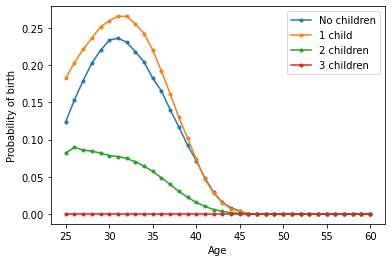

In [8]:
# 3. plot the arrival probabilities as a function of number of existing children
import matplotlib.pyplot as plt
plt.plot(np.tile(age_grid,
                 (num_n+1,1)).T,
         p.T,
         marker='.')
plt.xlabel('Age')
plt.ylabel('Probability of birth')
plt.legend(('No children','1 child','2 children','3 children'))
plt.savefig("childprob.pdf")